In [1]:
import numpy as np
import pandas as pd
import acquire
import prepare
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

## Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following

In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
train, validate, test = prepare.my_train_test_split(prepare.prep_titanic(df), target = 'survived')

In [4]:
train.head()

,survived,pclass,sibsp,parch,fare,alone
455,1,3,0,0,7.8958,1
380,1,1,0,0,227.5250,1
492,0,1,0,0,30.5000,1
55,1,1,0,0,35.5000,1
243,0,3,0,0,7.1250,1


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [5]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [6]:
baseline_accuracy = (train.survived == 0).mean()
print(f'The baseline accuracy is {baseline_accuracy * 100}%')

The baseline accuracy is 61.61048689138576%


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
X_train = train.drop(columns='survived')
y_train = train.survived

In [8]:
X_train.head()

,pclass,sibsp,parch,fare,alone
455,3,0,0,7.8958,1
380,1,0,0,227.5250,1
492,1,0,0,30.5000,1
55,1,0,0,35.5000,1
243,3,0,0,7.1250,1


In [9]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [10]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=2, random_state=123)
# fit the thing
model1.fit(X_train, y_train)
# use the thing

DecisionTreeClassifier(max_depth=2, random_state=123)

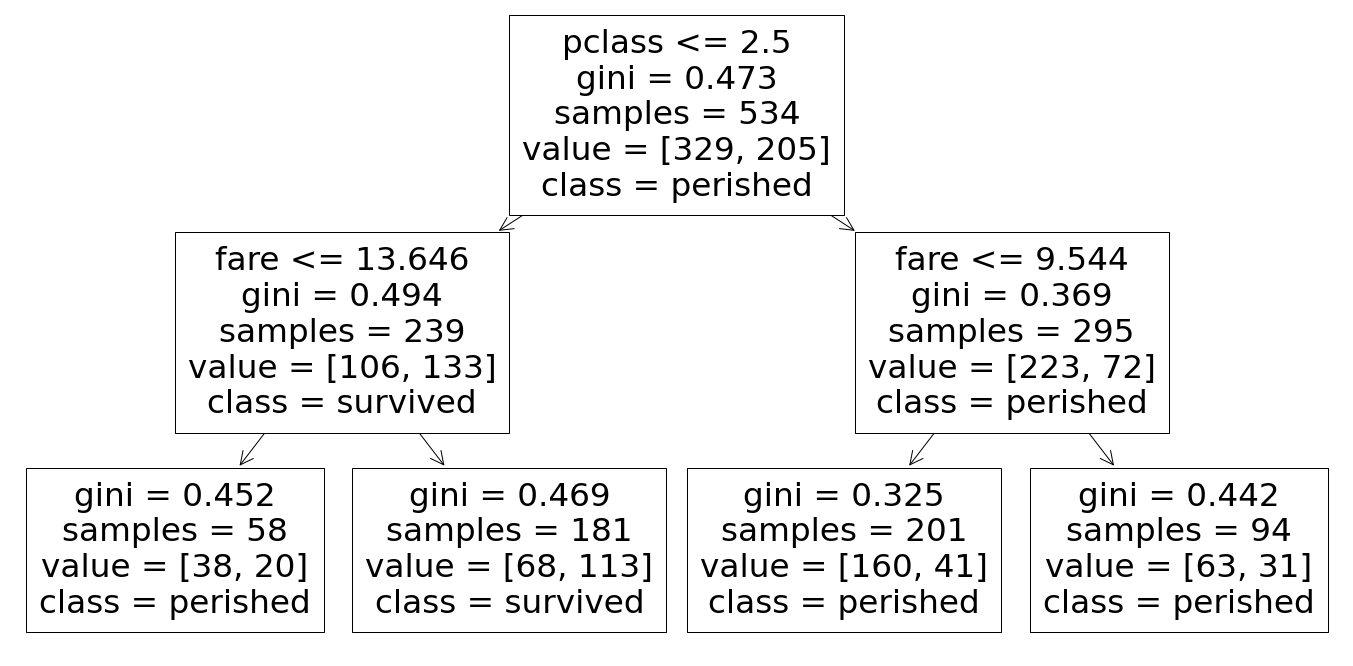

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [12]:
y_pred = model1.predict(X_train)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [15]:
y_preds = pd.DataFrame(
{
    'y_actual': y_train.values,
    'baseline': 0,
    'model_1': model1.predict(X_train)
})
y_preds

,y_actual,baseline,model_1
0,1,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
529,0,0,0
530,1,0,0
531,0,0,0
532,0,0,0


In [16]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6161048689138576

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [17]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.70


In [18]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[261,  68],
       [ 92, 113]])

In [19]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       329
           1       0.62      0.55      0.59       205

    accuracy                           0.70       534
   macro avg       0.68      0.67      0.68       534
weighted avg       0.70      0.70      0.70       534



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model1.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

In [ ]:
print(f'Positive is defined as not surviving; Negative is defined as surviving')
true_positive_count = confusion_matrix(y_train, y_pred)[0][0]
print(f'True positives: {true_positive_count}')
false_negative_count = confusion_matrix(y_train, y_pred)[1][0]
print(f'False negatives: {false_negative_count}')
false_positive_count = confusion_matrix(y_train, y_pred)[0][1]
print(f'False positives: {false_positive_count}')
true_negative_count = confusion_matrix(y_train, y_pred)[1][1]
print(f'True negatives: {true_negative_count}')

### 5. Run through steps 2-4 using a different max_depth value.

In [21]:
# make the thing
model2 = DecisionTreeClassifier(max_depth=7, random_state=123)
# fit the thing
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

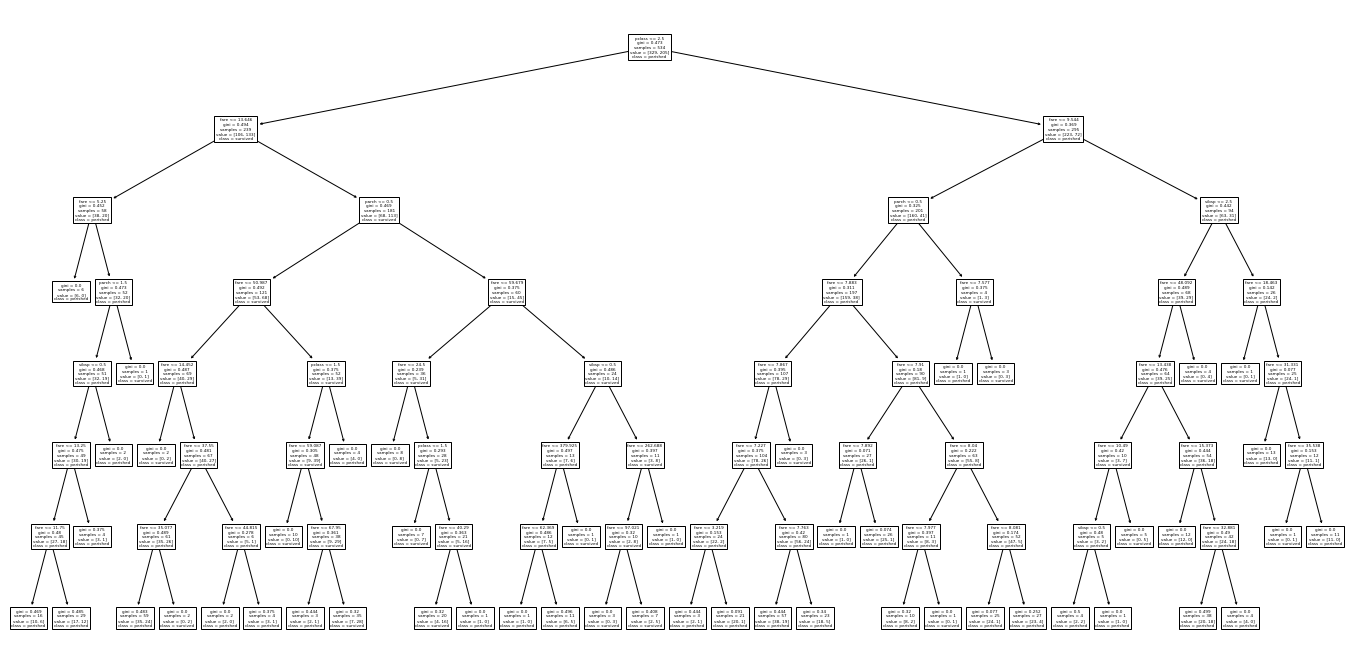

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [23]:
y_pred_2 = model2.predict(X_train)
y_pred_2

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model2.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred_2))
print()
print(classification_report(y_train, y_pred_2))

Accuracy of Decision Tree classifier on training set: 0.78

[[316  13]
 [104 101]]

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       329
           1       0.89      0.49      0.63       205

    accuracy                           0.78       534
   macro avg       0.82      0.73      0.74       534
weighted avg       0.80      0.78      0.76       534



### 6. Which model performs better on your in-sample data?

In [25]:
# accuracy performance on model1 to model2 (on train)
model1.score(X_train, y_train), model2.score(X_train, y_train)

(0.700374531835206, 0.7808988764044944)

### 7. Which model performs best on your out-of-sample data, the validate set?

In [27]:
x_val, y_val = validate.drop(columns='survived'), validate.survived

In [29]:
# accuracy performance on model1 to model2 (on validate)
model1.score(x_val, y_val), model2.score(x_val, y_val)

(0.702247191011236, 0.7359550561797753)